In [ ]:
# default_exp load_model

# Load Model

In [ ]:
#hide
from nbdev.showdoc import *
import sys
sys.path.append("..")
%load_ext autoreload
%autoreload 2

In [ ]:
#export
import torch 
import yaml
from fastcore.script import *
from swfd.recursos.model import *
import csv
import numpy as np
import os
import matplotlib.pyplot as plt
from swfd.web_scraping import *

loadModel(pathrun): Funcion que pasándole la dirección de una run saca su modelo

In [ ]:
#export
def loadModel(pathrun):
    pathyaml=str(pathrun)+"config.yaml"
    pathpth=str(pathrun)+"best.pth"
    config=yaml.safe_load(open(str(pathyaml)))
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = NBeatsNet(device=device,stack_types=(NBeatsNet.GENERIC_BLOCK, NBeatsNet.GENERIC_BLOCK),
                  nb_blocks_per_stack=config["nb_blocks_per_stack"]["value"],
                  thetas_dims=config["thetas_dims"]["value"],
                  hidden_layer_units=config["hidden_layer_units"]["value"],
                  forecast_length=config["horizon"]["value"],backcast_length=config["lookback"]["value"])
    checkpoint = torch.load(pathpth,map_location=device)
    model.load_state_dict(checkpoint['model_state_dict'])
    model.eval()
    return model


In [ ]:
#hide
currentfolderpathtest=os.getcwd()
pathmodeltest=currentfolderpathtest+"/test/example_run_forecast7/"
modeltest=loadModel(pathmodeltest)
modeltest

/home/miguel/anaconda3/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370172916/work/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0
/home/miguel/anaconda3/lib/python3.8/site-packages/torch/nn/modules/container.py:435: UserWarning: Setting attributes on ParameterList is not supported.
  warnings.warn("Setting attributes on ParameterList is not supported.")


NBeatsNet(
  (parameters): ParameterList(
      (0): Parameter containing: [torch.FloatTensor of size 128x42]
      (1): Parameter containing: [torch.FloatTensor of size 128]
      (2): Parameter containing: [torch.FloatTensor of size 128x128]
      (3): Parameter containing: [torch.FloatTensor of size 128]
      (4): Parameter containing: [torch.FloatTensor of size 128x128]
      (5): Parameter containing: [torch.FloatTensor of size 128]
      (6): Parameter containing: [torch.FloatTensor of size 128x128]
      (7): Parameter containing: [torch.FloatTensor of size 128]
      (8): Parameter containing: [torch.FloatTensor of size 7x128]
      (9): Parameter containing: [torch.FloatTensor of size 7x128]
      (10): Parameter containing: [torch.FloatTensor of size 42x7]
      (11): Parameter containing: [torch.FloatTensor of size 42]
      (12): Parameter containing: [torch.FloatTensor of size 7x7]
      (13): Parameter containing: [torch.FloatTensor of size 7]
      (14): Parameter conta

getCsvData(lookback):Funcion que devuelve el numero de valores de sfu empezando en start dias atras, "lookback" veces.

In [ ]:
#export
def getCsvData(lookback,start=0 ): #Inicio=start
    pathfoldercsv=getInfo("csvdirectory") #Obtiene del txt el path del csv
    csvname="sfuData.csv" #Siempre se llamara así 
    #csvname="2020.csv" #Ejemplocsv de datos de  2019-2020
    datalist=[]
    try:       
        with open(str(pathfoldercsv)+str(csvname)) as csv_file:
            forecastcount=0
            startcount=1
            for row in reversed(list(csv.reader(csv_file, delimiter=','))):
                if startcount < start: 
                    startcount= startcount +1
                elif(forecastcount<lookback):
                    datalist=np.append(datalist,float(row[1]))
                    forecastcount=forecastcount+1
                    
                    
    finally:
        csv_file.close()
    return datalist


In [ ]:
#hide
print(getCsvData(10))#10 primeros valores del excel
print(getCsvData(7,4))#7 valores a partir del 4º dia incluido

[70.3 72.1 72.2 72.5 73.9 74.1 74.3 74.2 72.9 74.7]
[72.5 73.9 74.1 74.3 74.2 72.9 74.7]


getNameRunFolders(horizon,runshorizonfolder): Funcion que devuelve lista con el directorio de todas las carpetas de un horizonte

In [ ]:
#export
def getNameRunFolders(horizon,runshorizonfolder): 
    runshorizonfolder=runshorizonfolder+"ensembleH"+str(horizon)
    pathfolderruns=[] #runs_directories
    contenido = os.listdir(str(runshorizonfolder))
    for i in contenido:
        pathrun=runshorizonfolder+"/"+str(i)+"/"
        pathfolderruns.append(pathrun)
    
    return pathfolderruns


In [ ]:
#hide
getNameRunFolders(7,"/home/miguel/Escritorio/tfg_swf/csv/pth/")

['/home/miguel/Escritorio/tfg_swf/csv/pth/ensembleH7/sweep_run_22/',
 '/home/miguel/Escritorio/tfg_swf/csv/pth/ensembleH7/sweep_run_3/',
 '/home/miguel/Escritorio/tfg_swf/csv/pth/ensembleH7/sweep_run_20/',
 '/home/miguel/Escritorio/tfg_swf/csv/pth/ensembleH7/sweep_run_72/',
 '/home/miguel/Escritorio/tfg_swf/csv/pth/ensembleH7/sweep_run_28/',
 '/home/miguel/Escritorio/tfg_swf/csv/pth/ensembleH7/sweep_run_87/',
 '/home/miguel/Escritorio/tfg_swf/csv/pth/ensembleH7/sweep_run_12/',
 '/home/miguel/Escritorio/tfg_swf/csv/pth/ensembleH7/sweep_run_89/',
 '/home/miguel/Escritorio/tfg_swf/csv/pth/ensembleH7/sweep_run_86/',
 '/home/miguel/Escritorio/tfg_swf/csv/pth/ensembleH7/sweep_run_49/',
 '/home/miguel/Escritorio/tfg_swf/csv/pth/ensembleH7/sweep_run_70/',
 '/home/miguel/Escritorio/tfg_swf/csv/pth/ensembleH7/sweep_run_80/',
 '/home/miguel/Escritorio/tfg_swf/csv/pth/ensembleH7/sweep_run_41/',
 '/home/miguel/Escritorio/tfg_swf/csv/pth/ensembleH7/sweep_run_71/',
 '/home/miguel/Escritorio/tfg_swf/c

singlePrediction(path,normalize): Funcion que hace la prediccion de una run concreta(carpeta individual)

In [ ]:
#export
def singlePrediction(filepath,normalize):
    net=loadModel(str(filepath))
    lookback=net.backcast_length
    data=getCsvData(lookback)#,net.forecast_length)
    row = torch.Tensor([data/normalize])
    backcast,forecast = net(row)
    preds_tensor=(forecast.detach().numpy())*normalize
    return preds_tensor[0].reshape(1,net.forecast_length)


ensemblePrediction(path,normalize): Funcion que se recorre cada carpeta de un horizonte y hace la predicion para cada run, devolviendo una lista con todas las predicciones.

In [ ]:
#hide
currentfolderpathtest=os.getcwd()
runpathtest=currentfolderpathtest+"/test/example_run_forecast3/" #"/test/example_run_forecast7/"
#runpath=currentfolderpath+"/test/example_run_forecast7/"
predicttest=singlePrediction(runpathtest,938.6)
print(predicttest)
print(type(predicttest),predicttest.shape)

[[79.85754 83.43284 94.86105]]
<class 'numpy.ndarray'> (1, 3)


In [ ]:
#export
def ensemblePrediction(horizon,normalize):
    prediction=np.empty((0,horizon))
    #prediction=np.matrix(np.empty(shape=(prediction,horizon), dtype=float))
    folderpath=getInfo("pthdirectory")
    runspath=getNameRunFolders(horizon,folderpath)
    for run in runspath:
        prediction=np.append(prediction,singlePrediction(run,normalize),axis=0)
    return prediction

In [ ]:
#hide
predicttest=ensemblePrediction(5,938.6)
#predicttest=ensemblePrediction(3,938.6)
print(predicttest)
print(len(predicttest))#len de 3 es el unico que tiene 180, el resto90

[[ 74.9811554   92.93279266  92.62215424  79.89615631  86.96374512]
 [ 84.54303741  91.93088531  87.83591461  91.26686096  88.9704361 ]
 [ 86.38433838  93.41148376  95.53562927  85.63298798  91.77668762]
 [ 84.73564148  76.6672821   89.0222702   85.6716156   90.73563385]
 [ 80.49998474  84.37187958  77.60178375  83.79947662  76.8421936 ]
 [ 86.80841827  91.5333252   82.43016052  84.47902679  86.20781708]
 [ 88.4601593   95.98140717  80.34392548  85.02624512  84.27838898]
 [ 73.78885651  96.20657349  91.78528595  87.34165192  80.62271118]
 [ 86.0059433   94.54686737  88.13044739  90.26797485  95.3828125 ]
 [ 91.41030121  82.90245056  91.30496216  95.15649414  98.47519684]
 [ 82.62045288  85.30243683  82.89681244  88.06807709  91.41293335]
 [ 79.20084381  88.19611359  91.72983551  86.9938736   84.81708527]
 [ 91.51332092  89.323349   101.92586517  83.14495087  88.73300934]
 [ 82.45927429  79.95215607  91.52713013  82.91751862  94.45544434]
 [ 96.93478394  92.32762909  96.63586426  92.880

ensembleMeanVar(prediction): Funcion que hace la media y varianza de los valores predichos

In [ ]:
#export
def ensembleMeanVar(prediction):
    meanlist=[]
    stdlist=[]
    for row in prediction.T:
        meanlist.append(row.mean())
        stdlist.append(row.std())
    
    return np.array(meanlist),np.array(stdlist)

In [ ]:
#hide
predicttest=ensemblePrediction(5,938.6)
ensembleMeanVar(predicttest)

(array([86.25172484, 89.57166015, 88.31796358, 88.67318929, 88.88809085]),
 array([9.19489042, 8.02982189, 8.1236641 , 8.54230127, 7.08595832]))

modelPrediction(forecast): Funcion general que invoca a las demas funciones para cargar y ver el modelo

In [ ]:
#export
def modelPrediction(forecast,normal):#Parametro normal esta para hacer pruebas
    #normalize=getMaxValueSfu()
    normalize=normal#Funcion web_scraping getMaxValueSfu(), funciona, pero parra ahorrar tiempo en las pruebas
  
    prediction=ensemblePrediction(forecast,normalize)
    
    mean,std=ensembleMeanVar(prediction)
    return prediction,mean,std 


In [ ]:
#hide
forecasttest=5
globalpredicttest,meantest,stdtest=modelPrediction(forecasttest,938.6)
print("----Mean----\n",meantest,"\n\n----Std----\n",stdtest,"\n\n----Predict----\n",globalpredicttest)

----Mean----
 [86.25172484 89.57166015 88.31796358 88.67318929 88.88809085] 

----Std----
 [9.19489042 8.02982189 8.1236641  8.54230127 7.08595832] 

----Predict----
 [[ 74.9811554   92.93279266  92.62215424  79.89615631  86.96374512]
 [ 84.54303741  91.93088531  87.83591461  91.26686096  88.9704361 ]
 [ 86.38433838  93.41148376  95.53562927  85.63298798  91.77668762]
 [ 84.73564148  76.6672821   89.0222702   85.6716156   90.73563385]
 [ 80.49998474  84.37187958  77.60178375  83.79947662  76.8421936 ]
 [ 86.80841827  91.5333252   82.43016052  84.47902679  86.20781708]
 [ 88.4601593   95.98140717  80.34392548  85.02624512  84.27838898]
 [ 73.78885651  96.20657349  91.78528595  87.34165192  80.62271118]
 [ 86.0059433   94.54686737  88.13044739  90.26797485  95.3828125 ]
 [ 91.41030121  82.90245056  91.30496216  95.15649414  98.47519684]
 [ 82.62045288  85.30243683  82.89681244  88.06807709  91.41293335]
 [ 79.20084381  88.19611359  91.72983551  86.9938736   84.81708527]
 [ 91.51332092  8

In [ ]:
#hide
#Funcion temporal para mostrar el modelo
def showModel(horizon,normal):
    lookback=horizon*6  
    data=getCsvData(lookback)
    predict,mean,std=modelPrediction(horizon,normal)
    
    forecastlist=[]
    for i in range(0,horizon):
        forecastlist.append(lookback+i-horizon)
        i=i+1
    print(mean)
    plt.plot(data[::-1],"r--",forecastlist,mean)
    plt.fill_between(forecastlist, mean-std, mean+std,alpha=0.5)
    plt.title("horizon"+str(horizon))
    plt.show()

In [ ]:
#hide
#Funcion temporal para mostrar todo los modelos de un horizonte
def showModels(normal):
    showModel(3,normal)
    showModel(5,normal)
    showModel(7,normal)
    showModel(10,normal)
    showModel(14,normal)
    #H21 esta incompleta (37 runs) por lo que deberia seguir funcionando pero ser mucho menos precisa
    showModel(21,normal)
    showModel(27,normal)

<h6>Las siguientes pruebas son cogidos de los datos actuales del csv, con diferentes valores para normalizar los datos<h6>

/home/miguel/anaconda3/lib/python3.8/site-packages/torch/nn/modules/container.py:435: UserWarning: Setting attributes on ParameterList is not supported.
  warnings.warn("Setting attributes on ParameterList is not supported.")


[89.0780518  87.61788771 89.15490481]


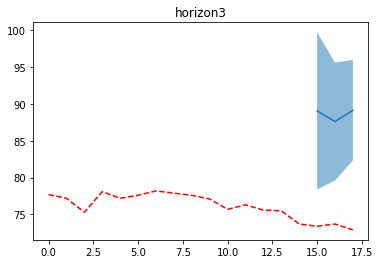

/home/miguel/anaconda3/lib/python3.8/site-packages/torch/nn/modules/container.py:435: UserWarning: Setting attributes on ParameterList is not supported.
  warnings.warn("Setting attributes on ParameterList is not supported.")


[86.25172484 89.57166015 88.31796358 88.67318929 88.88809085]


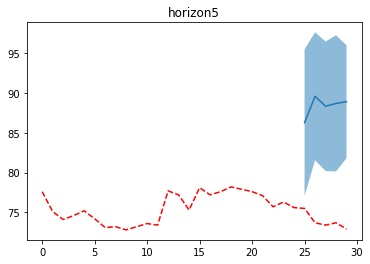

/home/miguel/anaconda3/lib/python3.8/site-packages/torch/nn/modules/container.py:435: UserWarning: Setting attributes on ParameterList is not supported.
  warnings.warn("Setting attributes on ParameterList is not supported.")


[87.10758175 90.43337801 87.62267723 88.80473065 88.15906135 86.73491169
 88.51118418]


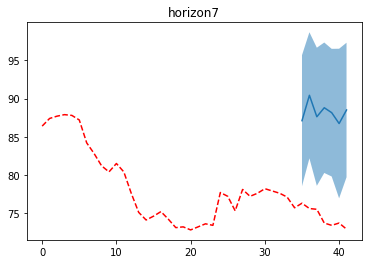

/home/miguel/anaconda3/lib/python3.8/site-packages/torch/nn/modules/container.py:435: UserWarning: Setting attributes on ParameterList is not supported.
  warnings.warn("Setting attributes on ParameterList is not supported.")


[88.96793938 89.00175266 89.26861318 90.73219435 86.85951964 90.89870266
 89.22356457 87.49411897 87.64107128 88.16590025]


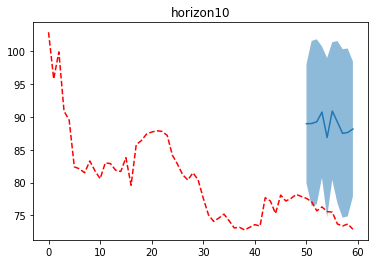

/home/miguel/anaconda3/lib/python3.8/site-packages/torch/nn/modules/container.py:435: UserWarning: Setting attributes on ParameterList is not supported.
  warnings.warn("Setting attributes on ParameterList is not supported.")


[92.8979649  93.11060838 91.35160018 93.25580516 87.40934618 92.32806528
 93.65668102 91.14066018 87.29862463 91.35787782 87.14631127 93.66988848
 91.95864169 90.84260894]


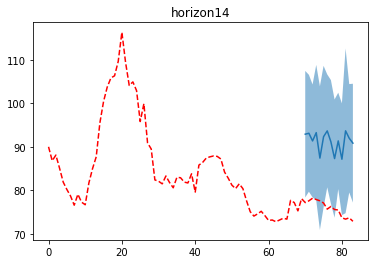

/home/miguel/anaconda3/lib/python3.8/site-packages/torch/nn/modules/container.py:435: UserWarning: Setting attributes on ParameterList is not supported.
  warnings.warn("Setting attributes on ParameterList is not supported.")


[ 94.8791718   96.6698051  101.39274894  89.94600275  86.98871485
  95.829646    99.04285261  83.95642302  88.77056026  88.88914034
  92.32171896  89.77012825  84.88977157  89.1034778   94.70137946
  90.72199546  98.24018372  96.56788699  85.29677735  89.69669893
  96.38688533]


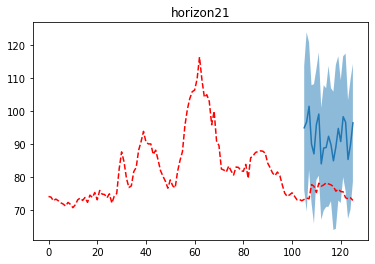

/home/miguel/anaconda3/lib/python3.8/site-packages/torch/nn/modules/container.py:435: UserWarning: Setting attributes on ParameterList is not supported.
  warnings.warn("Setting attributes on ParameterList is not supported.")


[89.55179749 89.65851398 89.99842189 96.76816872 94.82013556 88.87420718
 96.50750156 92.46110028 92.59022586 90.65544913 92.81003149 85.17124252
 96.78160354 95.19425189 86.56544888 94.08536699 89.95991806 85.81275461
 90.60973426 90.62199082 97.73428048 94.95758252 95.08131498 98.84671313
 94.96453512 89.1378429  94.9253888 ]


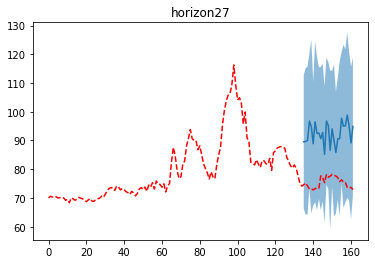

In [ ]:
#hide
#Funcion maximo valor desde 1949 de la essa
#datos actuales(1 año atras)
showModels(938.6)

/home/miguel/anaconda3/lib/python3.8/site-packages/torch/nn/modules/container.py:435: UserWarning: Setting attributes on ParameterList is not supported.
  warnings.warn("Setting attributes on ParameterList is not supported.")


[76.68241526 76.68885413 76.59793426]


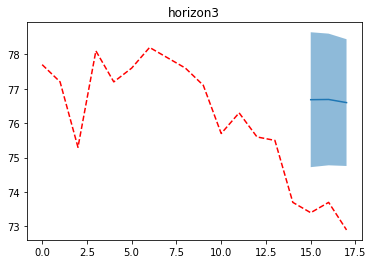

/home/miguel/anaconda3/lib/python3.8/site-packages/torch/nn/modules/container.py:435: UserWarning: Setting attributes on ParameterList is not supported.
  warnings.warn("Setting attributes on ParameterList is not supported.")


[75.93574295 76.08394674 76.03321237 75.98239127 75.88029361]


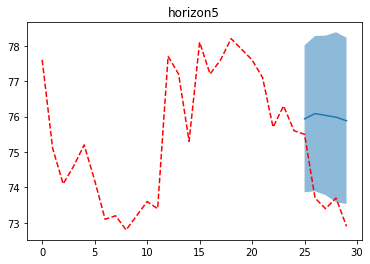

/home/miguel/anaconda3/lib/python3.8/site-packages/torch/nn/modules/container.py:435: UserWarning: Setting attributes on ParameterList is not supported.
  warnings.warn("Setting attributes on ParameterList is not supported.")


[78.22034175 77.95630646 77.71294878 77.30244692 76.95299462 76.65351113
 76.33604414]


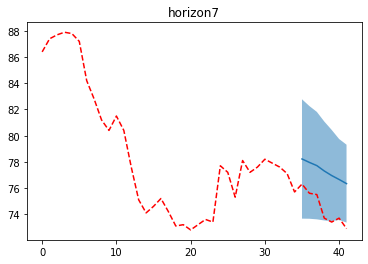

/home/miguel/anaconda3/lib/python3.8/site-packages/torch/nn/modules/container.py:435: UserWarning: Setting attributes on ParameterList is not supported.
  warnings.warn("Setting attributes on ParameterList is not supported.")


[83.27790968 83.21948251 82.73671731 82.20083177 81.57881037 81.1894154
 80.49400787 80.11913766 79.74819251 79.41231639]


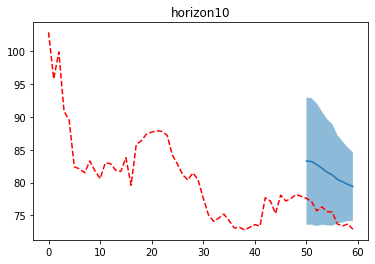

/home/miguel/anaconda3/lib/python3.8/site-packages/torch/nn/modules/container.py:435: UserWarning: Setting attributes on ParameterList is not supported.
  warnings.warn("Setting attributes on ParameterList is not supported.")


[85.17210905 84.78540632 84.24017046 84.0428449  83.46955227 83.01879391
 82.53816172 82.05963236 82.28610077 81.53701681 81.84360792 81.17458106
 81.15302336 80.77528924]


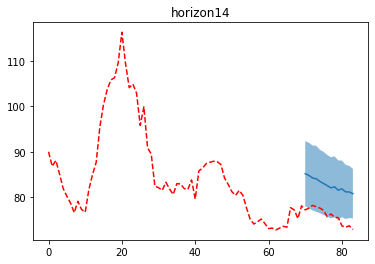

/home/miguel/anaconda3/lib/python3.8/site-packages/torch/nn/modules/container.py:435: UserWarning: Setting attributes on ParameterList is not supported.
  warnings.warn("Setting attributes on ParameterList is not supported.")


[78.61131838 78.7750668  79.31365161 79.9025597  79.79578357 80.19915411
 81.16968981 80.81377771 80.86877272 80.79690637 81.50921864 80.23762767
 80.54866621 80.00790808 80.53187455 80.73619419 80.30413098 80.11088265
 79.46376165 79.01973936 79.59586398]


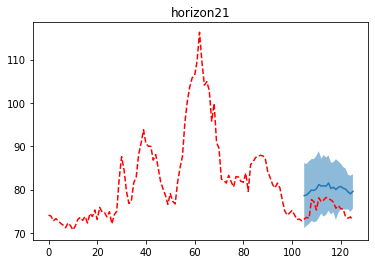

/home/miguel/anaconda3/lib/python3.8/site-packages/torch/nn/modules/container.py:435: UserWarning: Setting attributes on ParameterList is not supported.
  warnings.warn("Setting attributes on ParameterList is not supported.")


[77.40917986 78.02844484 78.19862993 78.25460052 78.60647757 78.6612581
 78.64294811 78.38796175 79.03375134 79.01642465 78.98636432 79.33569505
 78.80794008 78.4431633  78.62326084 77.92335379 77.84289873 77.90665495
 77.22246348 77.46932941 77.30005468 76.96188638 77.06105982 77.36070718
 77.25728845 77.1044348  76.98958071]


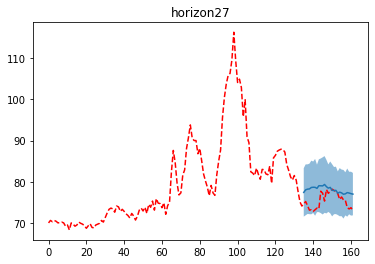

In [ ]:
#hide
#Funcion maximo valor solo de las 00:00 desde 1949 de la essa
#datos actuales(1 año atras)
showModels(383)

/home/miguel/anaconda3/lib/python3.8/site-packages/torch/nn/modules/container.py:435: UserWarning: Setting attributes on ParameterList is not supported.
  warnings.warn("Setting attributes on ParameterList is not supported.")


[75.38182276 73.63559685 71.66436352]


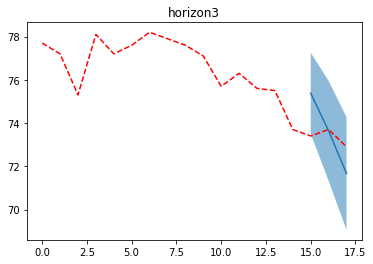

/home/miguel/anaconda3/lib/python3.8/site-packages/torch/nn/modules/container.py:435: UserWarning: Setting attributes on ParameterList is not supported.
  warnings.warn("Setting attributes on ParameterList is not supported.")


[74.75625568 73.31126734 72.02828946 70.64624091 68.93808695]


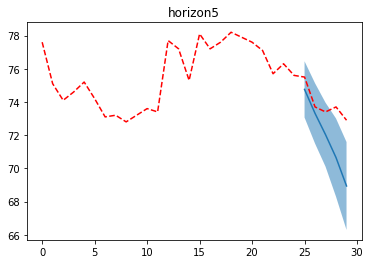

/home/miguel/anaconda3/lib/python3.8/site-packages/torch/nn/modules/container.py:435: UserWarning: Setting attributes on ParameterList is not supported.
  warnings.warn("Setting attributes on ParameterList is not supported.")


[76.33001285 74.82459827 73.5401663  71.670165   70.5662178  68.88884019
 67.72947875]


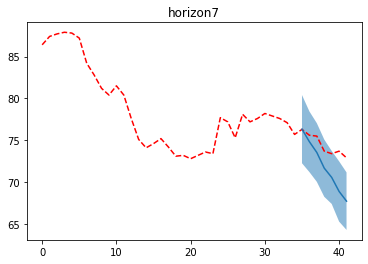

/home/miguel/anaconda3/lib/python3.8/site-packages/torch/nn/modules/container.py:435: UserWarning: Setting attributes on ParameterList is not supported.
  warnings.warn("Setting attributes on ParameterList is not supported.")


[79.66422636 77.81235936 76.62891062 75.01443727 73.33960402 71.13956167
 70.92074759 68.79373118 68.36126785 68.16092741]


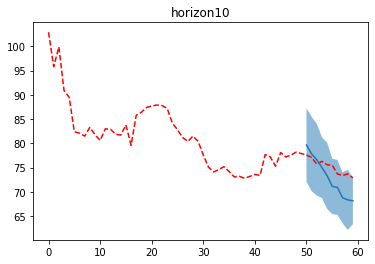

/home/miguel/anaconda3/lib/python3.8/site-packages/torch/nn/modules/container.py:435: UserWarning: Setting attributes on ParameterList is not supported.
  warnings.warn("Setting attributes on ParameterList is not supported.")


[78.92413165 78.22360399 76.6631749  75.12731383 74.58100277 73.03308784
 73.18114459 72.06435822 71.46910756 70.28444511 71.13896874 67.65935228
 69.73501227 68.83812442]


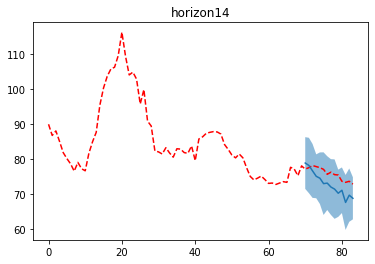

/home/miguel/anaconda3/lib/python3.8/site-packages/torch/nn/modules/container.py:435: UserWarning: Setting attributes on ParameterList is not supported.
  warnings.warn("Setting attributes on ParameterList is not supported.")


[74.25465107 72.39580462 72.19894293 73.94018629 74.41626718 71.6494795
 71.13934061 73.0476106  70.80281046 73.56784969 72.0631414  72.97880967
 72.16284211 70.76705277 70.70104101 71.06353548 67.55215889 69.8313765
 69.59019121 69.8233366  68.96121534]


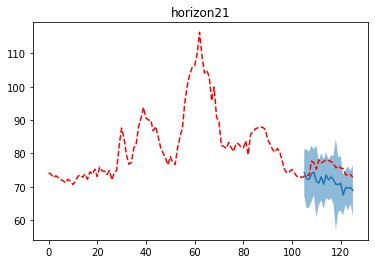

/home/miguel/anaconda3/lib/python3.8/site-packages/torch/nn/modules/container.py:435: UserWarning: Setting attributes on ParameterList is not supported.
  warnings.warn("Setting attributes on ParameterList is not supported.")


[72.90480499 71.70939246 68.6175844  68.33194118 68.74394624 70.14488042
 66.93042145 69.27237038 67.48815136 69.528475   67.1487712  69.45086823
 66.08918137 65.81777679 69.92551778 66.3400668  67.67155741 69.0322027
 66.81653014 67.39704742 65.44938944 66.28144086 63.86114123 64.40715379
 66.29945965 67.2376481  64.8545887 ]


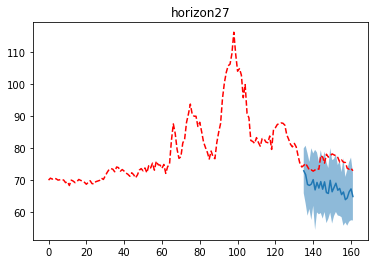

In [ ]:
#hide
#Funcion maximo valor aleatorio
#datos actuales(1 año atras)
showModels(150)

<h6>Las siguientes pruebas son datos cogidos de 2019-2020, con diferentes valores para normalizar los datos<h6>

/home/miguel/anaconda3/lib/python3.8/site-packages/torch/nn/modules/container.py:435: UserWarning: Setting attributes on ParameterList is not supported.
  warnings.warn("Setting attributes on ParameterList is not supported.")


[87.26350282 85.41551753 87.16597214]


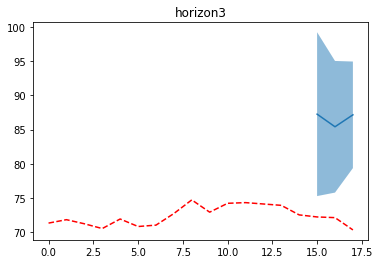

/home/miguel/anaconda3/lib/python3.8/site-packages/torch/nn/modules/container.py:435: UserWarning: Setting attributes on ParameterList is not supported.
  warnings.warn("Setting attributes on ParameterList is not supported.")


[84.51451569 88.20623673 86.71949599 87.03339038 87.28315294]


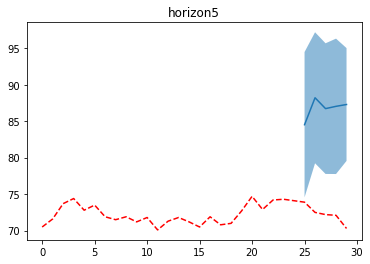

/home/miguel/anaconda3/lib/python3.8/site-packages/torch/nn/modules/container.py:435: UserWarning: Setting attributes on ParameterList is not supported.
  warnings.warn("Setting attributes on ParameterList is not supported.")


[84.22072127 88.10835648 85.12481266 86.58237733 86.01735717 84.25082122
 86.83394152]


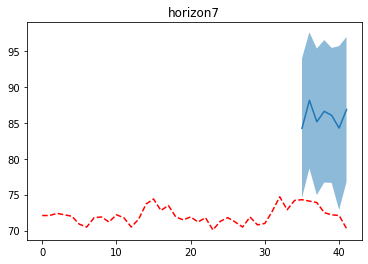

/home/miguel/anaconda3/lib/python3.8/site-packages/torch/nn/modules/container.py:435: UserWarning: Setting attributes on ParameterList is not supported.
  warnings.warn("Setting attributes on ParameterList is not supported.")


[83.66205143 83.92069197 84.41629329 86.62016932 81.38548508 87.91909951
 85.64950799 83.97066744 83.19823558 84.22386392]


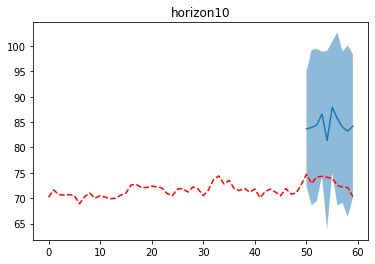

/home/miguel/anaconda3/lib/python3.8/site-packages/torch/nn/modules/container.py:435: UserWarning: Setting attributes on ParameterList is not supported.
  warnings.warn("Setting attributes on ParameterList is not supported.")


[86.10429026 87.2258308  84.37498141 89.23452501 81.13006115 88.37058211
 88.99175021 84.55420625 79.99595206 85.4665618  79.73044715 89.58458811
 84.73894964 86.17752431]


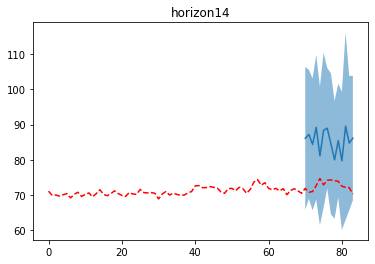

/home/miguel/anaconda3/lib/python3.8/site-packages/torch/nn/modules/container.py:435: UserWarning: Setting attributes on ParameterList is not supported.
  warnings.warn("Setting attributes on ParameterList is not supported.")


[90.40761365 94.09484567 99.23213927 82.36753556 79.60478889 91.0806623
 94.62134245 72.92453967 79.46848612 80.31315719 85.50904965 81.74142027
 74.53298238 80.4067013  87.74643384 81.50506285 93.6630995  91.35875935
 74.66016338 81.31848685 90.28024928]


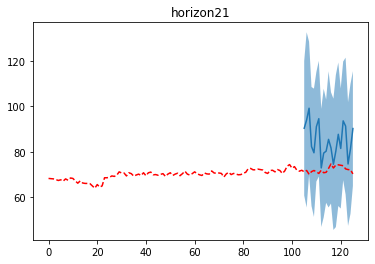

/home/miguel/anaconda3/lib/python3.8/site-packages/torch/nn/modules/container.py:435: UserWarning: Setting attributes on ParameterList is not supported.
  warnings.warn("Setting attributes on ParameterList is not supported.")


[84.22873422 83.46855575 86.42648247 93.64390083 88.62721079 82.09801696
 91.49440754 87.18208696 87.1693488  84.04576573 87.46884316 77.33592881
 92.89098456 89.9903962  80.00283089 89.3236141  85.04673631 77.83847705
 85.23847983 84.23521584 94.84403926 91.14951702 91.04689507 96.3766184
 92.75689158 82.39054962 91.14748029]


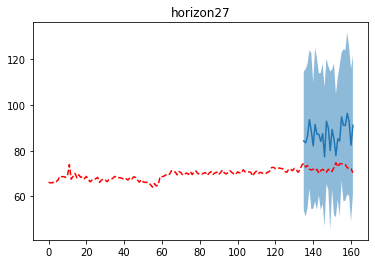

In [ ]:
#hide
#Funcion maximo valor desde 1949 de la essa
#datos 19-20
showModels(938.6)

/home/miguel/anaconda3/lib/python3.8/site-packages/torch/nn/modules/container.py:435: UserWarning: Setting attributes on ParameterList is not supported.
  warnings.warn("Setting attributes on ParameterList is not supported.")


[71.81536577 71.61330011 71.43543553]


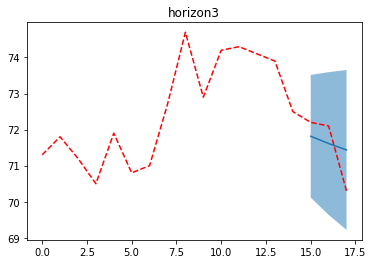

/home/miguel/anaconda3/lib/python3.8/site-packages/torch/nn/modules/container.py:435: UserWarning: Setting attributes on ParameterList is not supported.
  warnings.warn("Setting attributes on ParameterList is not supported.")


[72.26504534 72.2744155  72.17487284 72.10697089 72.02053146]


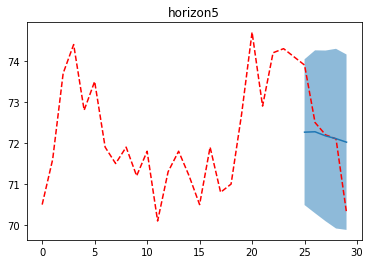

/home/miguel/anaconda3/lib/python3.8/site-packages/torch/nn/modules/container.py:435: UserWarning: Setting attributes on ParameterList is not supported.
  warnings.warn("Setting attributes on ParameterList is not supported.")


[72.66601774 72.63968353 72.61657867 72.52362569 72.48178101 72.4249315
 72.30361167]


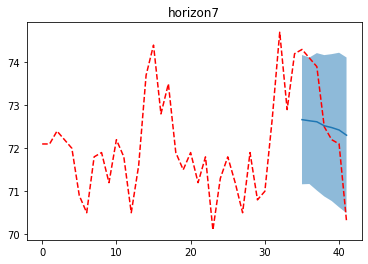

/home/miguel/anaconda3/lib/python3.8/site-packages/torch/nn/modules/container.py:435: UserWarning: Setting attributes on ParameterList is not supported.
  warnings.warn("Setting attributes on ParameterList is not supported.")


[71.80506278 71.79883821 71.69039408 71.68054555 71.66373791 71.63963572
 71.57499907 71.52138697 71.57928636 71.54723138]


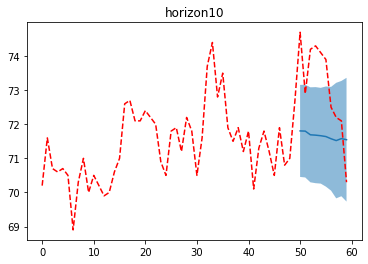

/home/miguel/anaconda3/lib/python3.8/site-packages/torch/nn/modules/container.py:435: UserWarning: Setting attributes on ParameterList is not supported.
  warnings.warn("Setting attributes on ParameterList is not supported.")


[71.84198914 71.80907355 71.68569421 71.62805778 71.59030194 71.49726444
 71.39920485 71.23819673 71.30864436 71.17960807 71.34661212 71.10641157
 71.16963103 71.05149502]


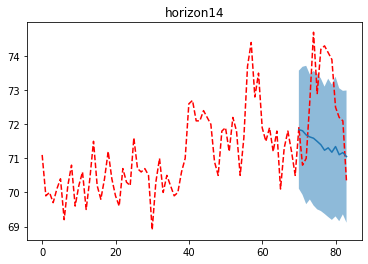

/home/miguel/anaconda3/lib/python3.8/site-packages/torch/nn/modules/container.py:435: UserWarning: Setting attributes on ParameterList is not supported.
  warnings.warn("Setting attributes on ParameterList is not supported.")


[67.97791587 68.13724624 68.14977052 68.15680843 68.00091638 68.03562027
 68.08093834 68.29848798 68.36605856 68.48396852 68.78569179 67.94491948
 68.17103555 68.16805394 68.70618778 68.61075444 68.6448218  68.3609155
 68.51853689 68.0105771  68.24715826]


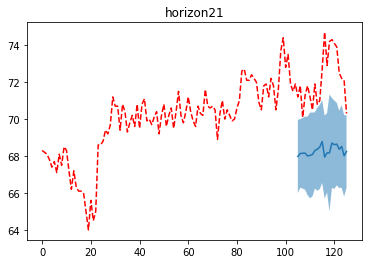

/home/miguel/anaconda3/lib/python3.8/site-packages/torch/nn/modules/container.py:435: UserWarning: Setting attributes on ParameterList is not supported.
  warnings.warn("Setting attributes on ParameterList is not supported.")


[69.48309428 69.52089373 69.5542714  69.61752107 69.87712152 69.45184335
 69.63385722 69.61497014 69.67893092 69.31764272 69.48981552 69.35922504
 69.52997225 69.64965265 69.51582315 69.26096149 69.27720566 69.53475003
 69.29979028 69.47369402 69.2845289  69.66089422 69.45669314 69.27804459
 69.26606471 69.440006   69.27475798]


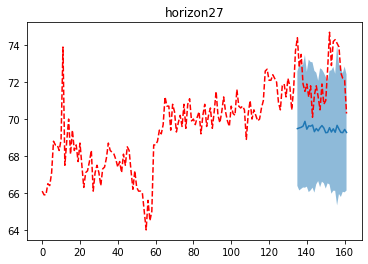

In [ ]:
#hide
#Funcion maximo valor solo de las 00:00 desde 1949 de la essa
#datos 19-20
showModels(383)

In [ ]:
#hide
maxvaluesdf=getMaxValueSfu()
print(maxvaluesdf)

938.6
